# Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Load Data

In [2]:
data = pd.read_csv("Data/DSB_BDK_trainingset.csv", sep=";")

/var/folders/_6/l3776shn2kq8j4f7hm3qr5bh0000gn/T/ipykernel_5497/2141471441.py:1: DtypeWarning: Columns (44,45,53,103,132,137,138,141,144,145,146,147,148,149,150,153,155,156,157,194,201,204,206,208) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("Data/DSB_BDK_trainingset.csv", sep=";")


In [3]:
random_state=42

In [4]:
data.isnull().sum().sum()

0

# Understand data
Load the findings to a .csv file

In [5]:
# Define the dataframe and columns
feature_information = pd.DataFrame(columns=['Navn','Cat/Num','Datatype','Min', 'Max', 'Mean', 'Std', 'Notes'])

In [6]:
# Easily extract needed value from the decribe function with integer-conversion 
def extract_from_describe(described, descriptor):
    value = described[descriptor]
    if value.is_integer():
        return int(value)
    return value

In [7]:
# Insert rows in dataframe
cat_var = []
for col in data.columns:
    if data[col].dtypes == 'O':
        df = pd.DataFrame({'Navn': col, 'Cat/Num': 'Categorical'}, index=[0])
        feature_information = pd.concat([feature_information, df], ignore_index=True)
        cat_var += [col]
    else:
        col_data = data[col].describe()
        min1 = extract_from_describe(col_data, 'min')
        max1 = extract_from_describe(col_data, 'max')
        mean1 = extract_from_describe(col_data, 'mean')
        std1 = extract_from_describe(col_data, 'std')
        datatype = 'float'
        if np.array_equal(data[col], data[col].astype(int)):
            datatype = 'int'
        df = pd.DataFrame({'Navn': col, 'Cat/Num': 'Numerical','Datatype': datatype,'Min':min1
                           , 'Max':max1, 'Mean': mean1, 'Std': std1}, index=[0])
        feature_information = pd.concat([feature_information, df], ignore_index=True)

In [8]:
# The final result
feature_information

,Navn,Cat/Num,Datatype,Min,Max,Mean,Std,Notes
0,dato,Categorical,NaN,NaN,NaN,NaN,NaN,NaN
1,togpunktlighed,Numerical,float,0,1,0.821591,0.238724,NaN
2,koreplan_antal_planlagte_unik_tognr_togpkt_myl...,Numerical,int,0,163,15.861782,22.462998,NaN
3,koreplan_antal_planlagte_prod_kode_myldretid,Numerical,int,0,16,2.295729,2.598718,NaN
4,koreplan_stdafv_antal_unik_prod_kode_per_time_...,Numerical,float,0,2.66,0.291664,0.378702,NaN
...,...,...,...,...,...,...,...,...
205,dsb_lkf_sygdom,Categorical,NaN,NaN,NaN,NaN,NaN,NaN
206,dsb_lkf_relative_sygdom,Categorical,NaN,NaN,NaN,NaN,NaN,NaN
207,dsb_haandvaerker,Numerical,int,297,564,465.667038,82.965696,NaN
208,dsb_fravaer,Categorical,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Save as .csv file
feature_information.to_csv("Data/Feature_information.csv", float_format='%.3f')

# Only Kystbanen test with Random Forest

In [10]:
# The columns that are marked "Categorical" often contains separator errors.
cat_var
len(cat_var)

47

In [11]:
# Only looking at Kystbanen
# We exclude the "Categorical" columns for now
data_20 = data[data["visualiseringskode"] == 20]
data_20 = data_20.drop(cat_var,axis=1)

In [12]:
data_20.shape

(10228, 163)

In [13]:
data_20

,togpunktlighed,koreplan_antal_planlagte_unik_tognr_togpkt_myldretid,koreplan_antal_planlagte_prod_kode_myldretid,koreplan_stdafv_antal_unik_prod_kode_per_time_myldretid,koreplan_antal_planlagte_unik_tognr_alle_myldretid,koreplan_stdafv_antal_unik_tognr_alle_per_time_myldretid,koreplan_antal_planlagte_unik_tognr_alle_g_meld_myldretid,koreplan_antal_planlagte_togfoelge_under_5_min_myldretid,koreplan_gns_planlagte_togfoelg_alle_min_myldretid,koreplan_stdafv_planlagte_togfoelg_alle_min_myldretid,...,dsb_lkf_litra_relative_qualifications_me,dsb_lkf_litra_relative_qualifications_mg,dsb_lkf_litra_relative_qualifications_mq,dsb_lkf_litra_relative_qualifications_mr,dsb_event_count,dsb_0_1,dsb_tgf_sygdom,dsb_tgf_relative_sygdom,dsb_haandvaerker,dsb_relative_fravaer
15,0.873,18.0,4.0,0.41,25.0,0.41,0.0,0.0,30.48,76.58,...,0.411126,0.769501,0.340791,0.446294,1.0,15,15.0,0.037377,348.0,0.082654
27,0.942,69.0,8.0,1.26,74.0,1.75,0.0,38.0,9.75,42.57,...,0.411126,0.769501,0.340791,0.446294,1.0,15,15.0,0.037377,348.0,0.082654
31,0.916,98.0,9.0,1.17,113.0,3.19,4.0,42.0,21.80,79.69,...,0.411126,0.769501,0.340791,0.446294,1.0,15,15.0,0.037377,348.0,0.082654
45,0.932,54.0,4.0,0.41,56.0,2.94,2.0,0.0,26.23,69.74,...,0.411126,0.769501,0.340791,0.446294,1.0,15,15.0,0.037377,348.0,0.082654
93,0.857,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.00,...,0.411126,0.769501,0.340791,0.446294,1.0,10,15.0,0.037377,348.0,0.082654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199335,0.926,72.0,1.0,0.00,72.0,0.00,0.0,24.0,20.14,61.46,...,0.442356,0.878446,0.211779,0.114035,0.0,10,14.0,0.041841,298.0,0.207649
199383,0.934,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.00,...,0.442356,0.878446,0.211779,0.114035,0.0,9,7.0,0.020921,298.0,0.095619
199395,0.891,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.00,...,0.442356,0.878446,0.211779,0.114035,0.0,9,7.0,0.020921,298.0,0.095619
199399,0.896,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.00,...,0.442356,0.878446,0.211779,0.114035,0.0,9,7.0,0.020921,298.0,0.095619


In [14]:
# Divide into input and target.
# Divide into train and test set. 
X = data_20.iloc[:,1:]
y = data_20.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state = random_state)

In [15]:
X.shape

(10228, 162)

In [16]:
y.shape

(10228,)

In [17]:
# Check sizes and dtypes
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")
X_train.info()

Shape of X_train: (9205, 162)
Shape of X_test: (1023, 162)
Shape of y_train: (9205,)
Shape of y_test: (1023,)
<class 'pandas.core.frame.DataFrame'>
Index: 9205 entries, 178119 to 141757
Columns: 162 entries, koreplan_antal_planlagte_unik_tognr_togpkt_myldretid to dsb_relative_fravaer
dtypes: float64(113), int64(49)
memory usage: 11.4 MB


In [18]:
#Build Random Forest Regression Model
regressor = RandomForestRegressor(n_estimators=100, random_state=random_state, oob_score=True, max_depth=5)

In [19]:
# Train model
regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, oob_score=True, random_state=42)

In [20]:
# Test model
predictions = regressor.predict(X_test)


In [21]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y_test, predictions)
print(f'R-squared: {r2}')

Mean Squared Error: 0.008097106064680693
R-squared: 0.7120784254445587


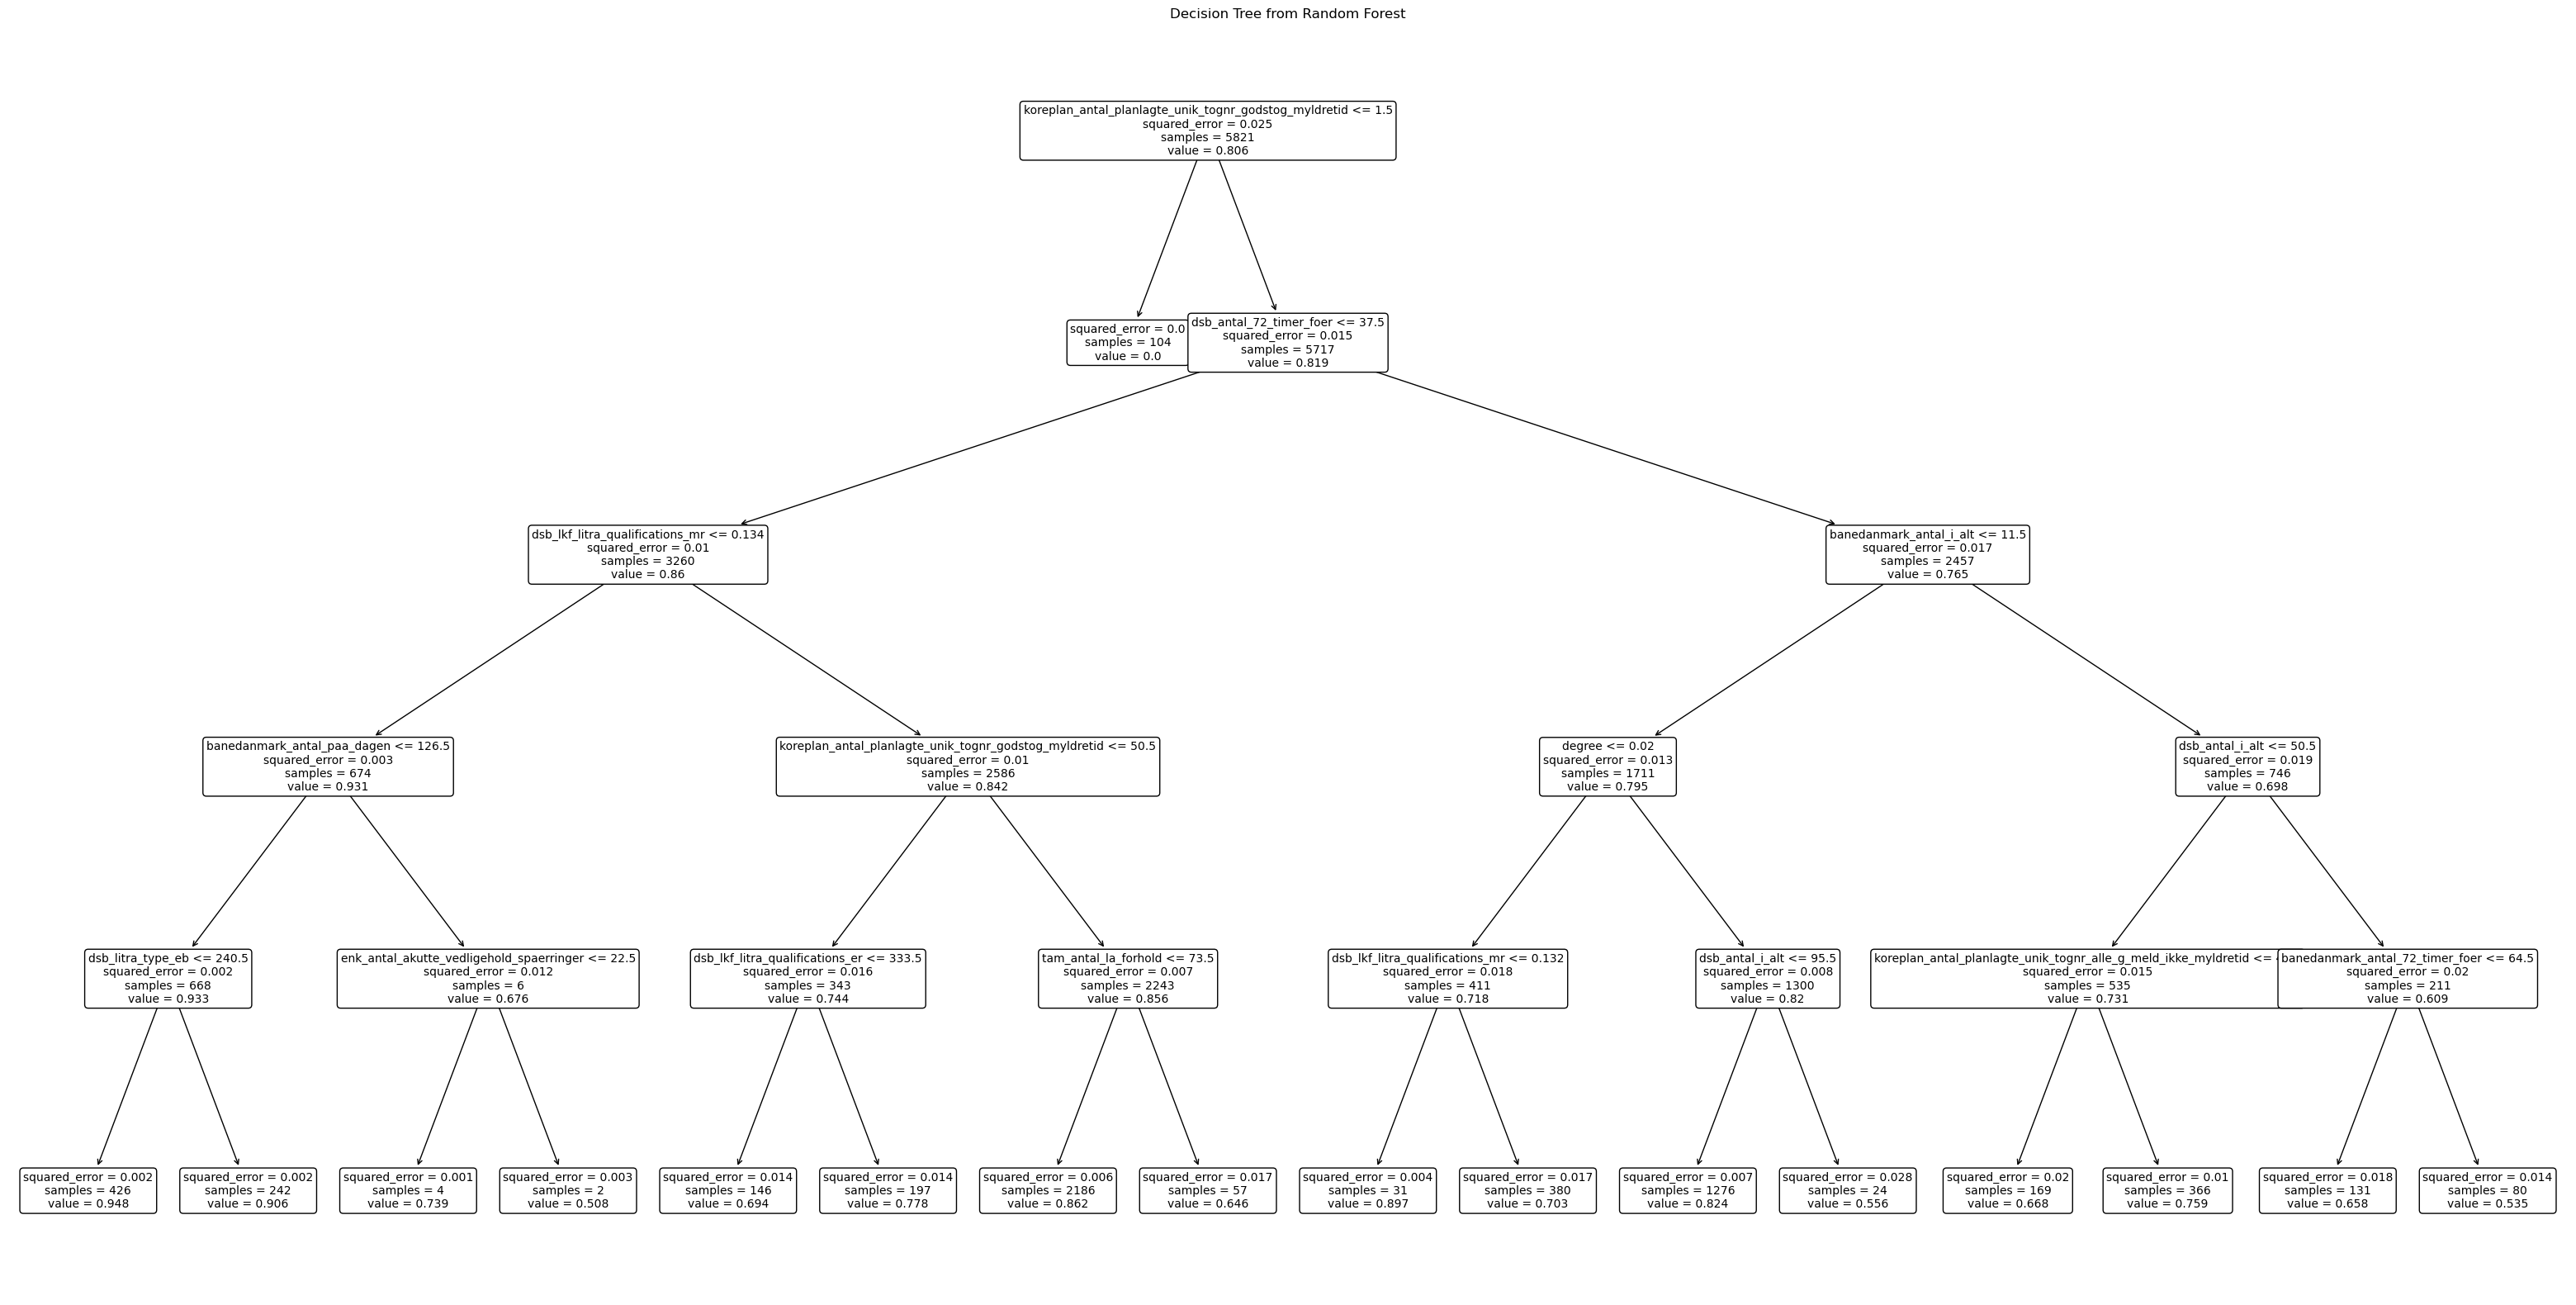

In [22]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
 
# Regressor is the trained Random Forest model
# Pick one tree from the forest, e.g., the first tree (index 0)
tree_to_plot = regressor.estimators_[0]
 
# Plot the decision tree
plt.figure(figsize=(40, 20))
plot_tree(tree_to_plot, feature_names=data_20.columns.tolist(), filled=False, rounded=True, fontsize=10)
plt.title("Decision Tree from Random Forest")
plt.show()

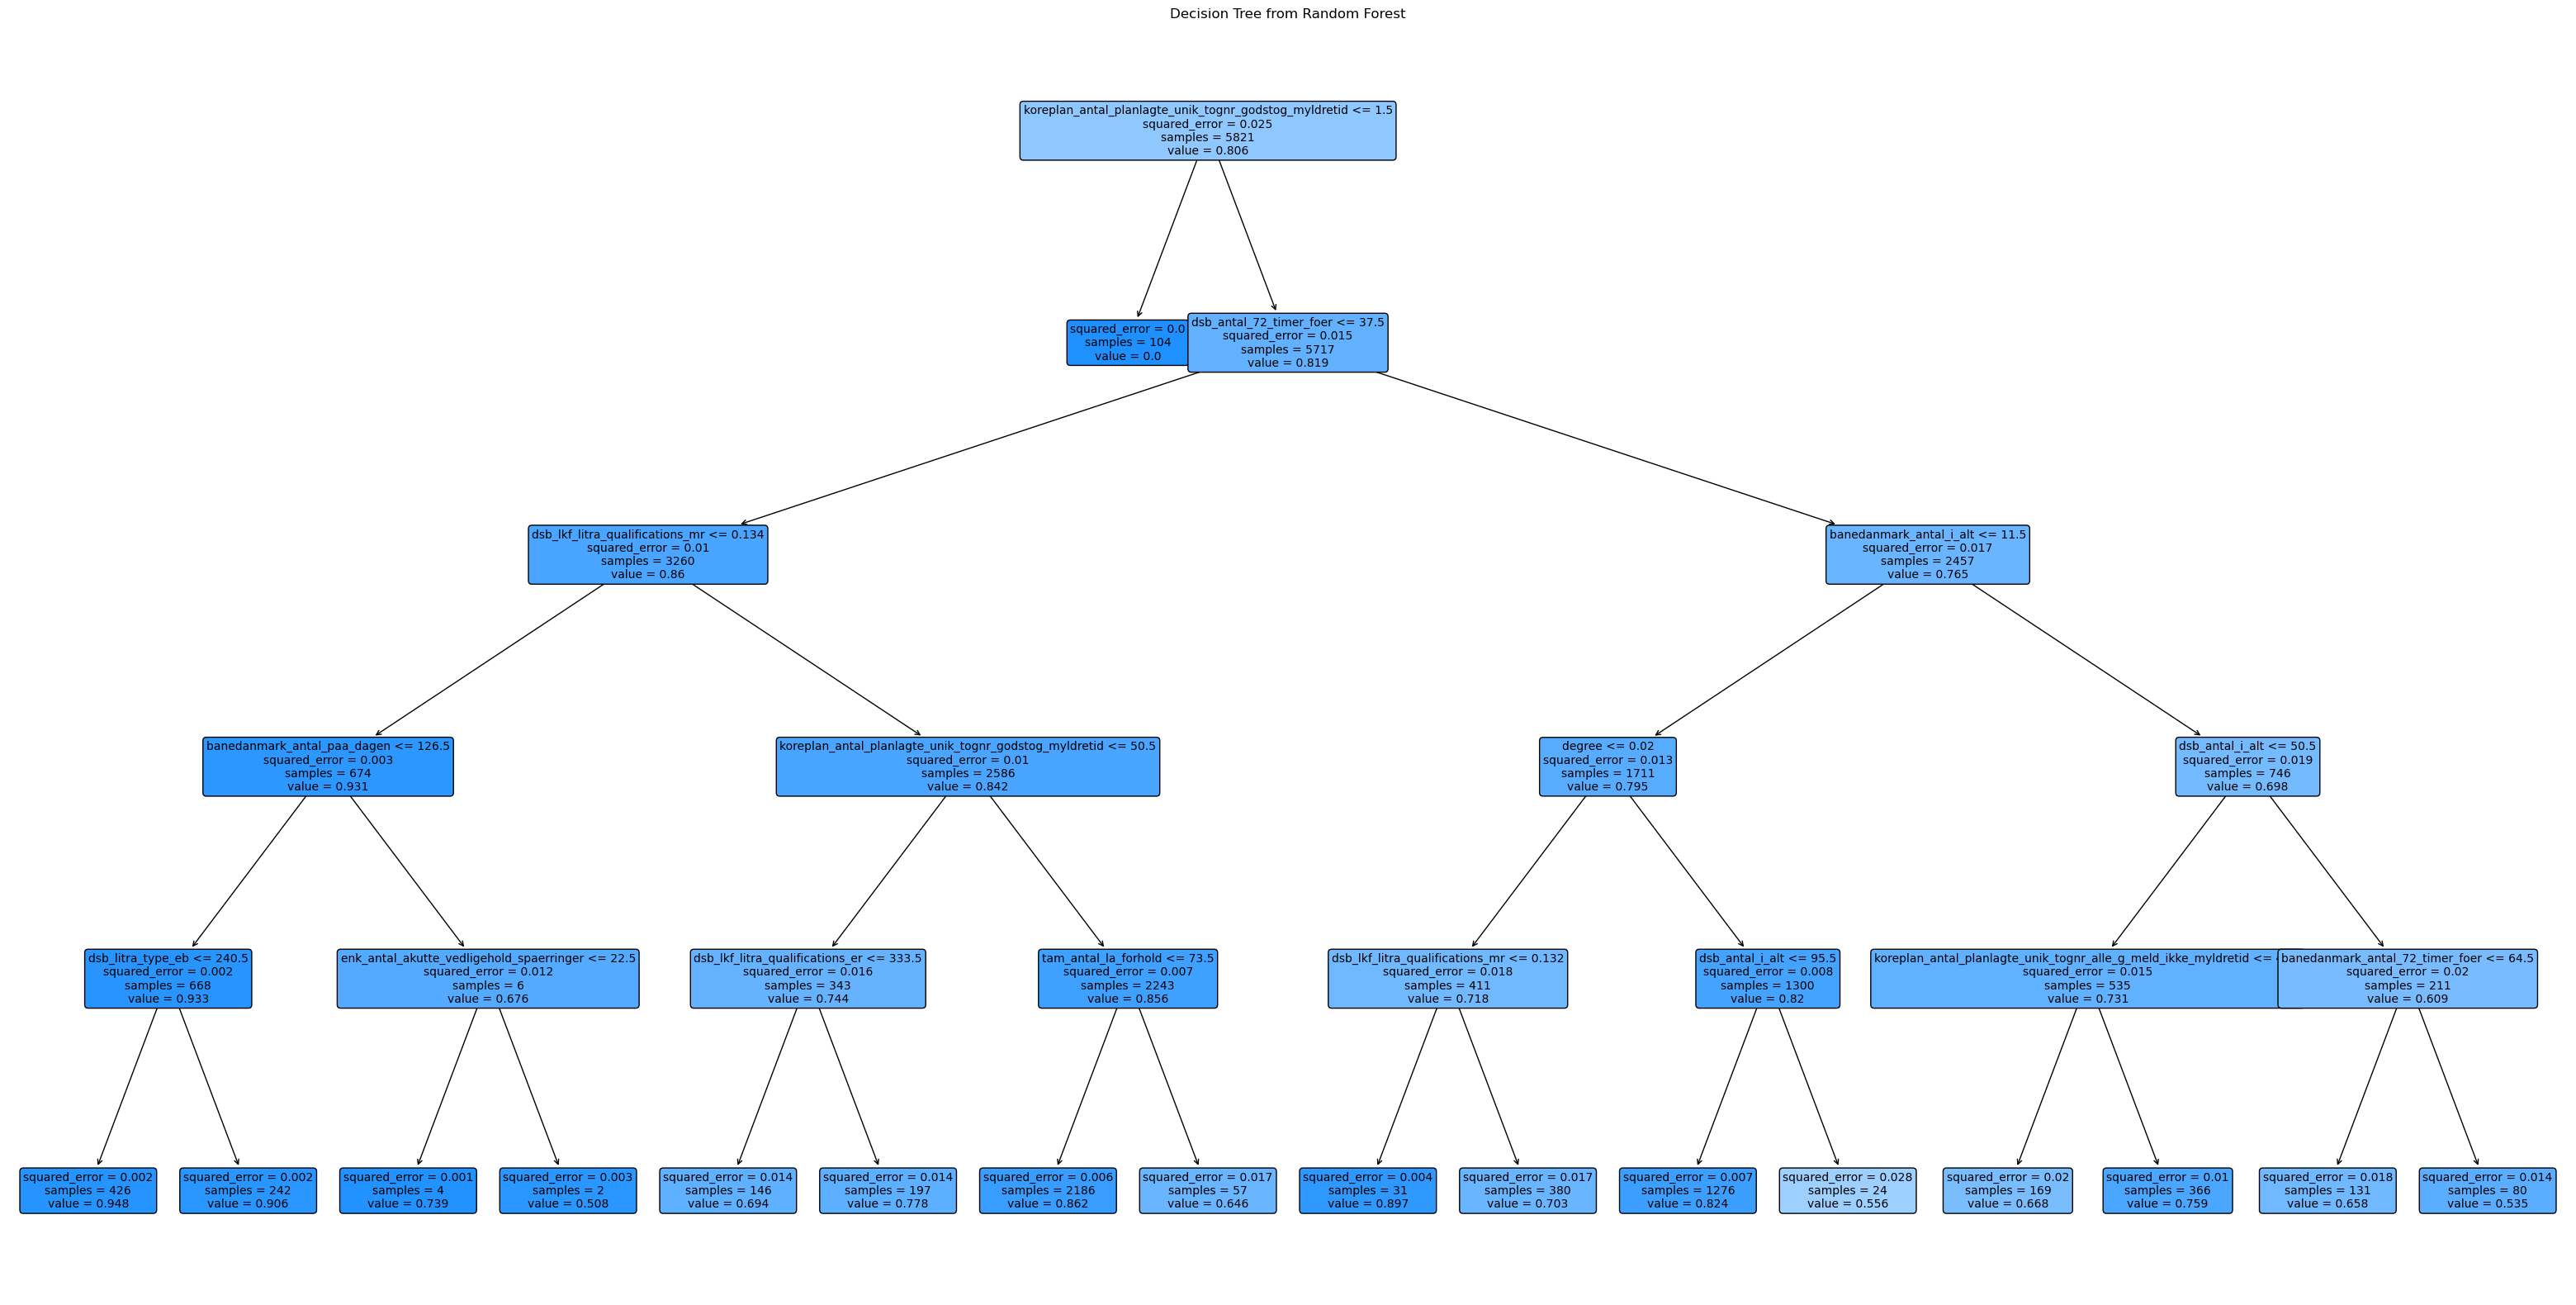

In [23]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, to_rgb

 
# Regressor is the trained Random Forest model
# Pick one tree from the forest, e.g., the first tree (index 0)
tree_to_plot = regressor.estimators_[0]
 
# Plot the decision tree
plt.figure(figsize=(40, 20))
artists = plot_tree(tree_to_plot, feature_names=data_20.columns.tolist(), filled=False, rounded=True, fontsize=10)

colors = ['dodgerblue']

for artist, impurity, value in zip(artists, tree_to_plot.tree_.impurity, tree_to_plot.tree_.value):
    r, g, b = to_rgb(colors[np.argmax(value)])
    f = impurity * 20
    artist.get_bbox_patch().set_facecolor((f + (1-f)*r, f + (1-f)*g, f + (1-f)*b))

plt.title("Decision Tree from Random Forest")
plt.show()

In [24]:
from sklearn.tree import export_graphviz
import pydot
export_graphviz(tree_to_plot, out_file = 'tree.dot', feature_names = data_20.drop("togpunktlighed", axis=1).columns.tolist(), rounded = True, precision = 2)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')

In [25]:
# Tjek hvor mange gange de forskellige features bliver brugt
feature_names = data_20.drop("togpunktlighed", axis=1).columns.tolist()

occurences = {feature_names[i]: 0 for i in range(len(feature_names))}

for i in range(len(regressor.estimators_)):
    one_tree_feature = regressor.estimators_[i].tree_.feature
    for j in one_tree_feature:
        occurences[feature_names[j]] += 1



In [26]:
occurences

{'koreplan_antal_planlagte_unik_tognr_togpkt_myldretid': 2,
 'koreplan_antal_planlagte_prod_kode_myldretid': 3,
 'koreplan_stdafv_antal_unik_prod_kode_per_time_myldretid': 15,
 'koreplan_antal_planlagte_unik_tognr_alle_myldretid': 1,
 'koreplan_stdafv_antal_unik_tognr_alle_per_time_myldretid': 1,
 'koreplan_antal_planlagte_unik_tognr_alle_g_meld_myldretid': 0,
 'koreplan_antal_planlagte_togfoelge_under_5_min_myldretid': 5,
 'koreplan_gns_planlagte_togfoelg_alle_min_myldretid': 4,
 'koreplan_stdafv_planlagte_togfoelg_alle_min_myldretid': 3,
 'koreplan_antal_planlagte_unik_tognr_godstog_myldretid': 0,
 'koreplan_antal_planlagte_unik_tognr_togpkt_ikke_myldretid': 242,
 'koreplan_antal_planlagte_prod_kode_ikke_myldretid': 5,
 'koreplan_stdafv_antal_unik_prod_kode_per_time_ikke_myldretid': 1,
 'koreplan_antal_planlagte_unik_tognr_alle_ikke_myldretid': 29,
 'koreplan_stdafv_antal_unik_tognr_alle_per_time_ikke_myldretid': 5,
 'koreplan_antal_planlagte_unik_tognr_alle_g_meld_ikke_myldretid': 5

In [35]:
sorted(occurences, key=occurences.get, reverse=True)

['dsb_haandvaerker',
 'koreplan_antal_planlagte_unik_tognr_togpkt_ikke_myldretid',
 'banedanmark_antal_72_timer_foer',
 'dsb_lkf_litra_relative_qualifications_abs',
 'banedanmark_antal_paa_dagen',
 'dsb_antal_paa_dagen',
 'antal_forsinkelse_fra_sverige_ikke_myldretid',
 'dsb_antal_i_alt',
 'ekstern_antal_72_timer_foer',
 'dsb_litra_type_er',
 'banedanmark_antal_i_alt',
 'station',
 'dsb_antal_72_timer_foer',
 'betweenness',
 'koreplan_antal_planlagte_unik_tognr_alle_ikke_myldretid',
 'dsb_lkf_litra_qualifications_et',
 'degree',
 'koreplan_stdafv_antal_unik_prod_kode_per_time_myldretid',
 'SEASON_COS',
 'dsb_antal_uberoert',
 'sap_sporskifte_antal_vedligehold_opgaver',
 'dsb_lkf_litra_qualifications_mq',
 'koreplan_antal_planlagte_togfoelge_under_5_min_ikke_myldretid',
 'koreplan_gns_planlagte_togfoelg_alle_min_ikke_myldretid',
 'dsb_lkf_litra_qualifications_mf',
 'dsb_lkf_litra_relative_qualifications_mg',
 'dsb_litra_km_accumulated_ets',
 'dsb_relative_kompetencer_hvk_et',
 'koreplan

# Statistical Feature Selection